## Fifa World Cup Data

In [96]:
#import the Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import the libraries for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches = pd.read_csv('WorldCupMatches.csv')
#preview the data
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [4]:
players = pd.read_csv('WorldCupPlayers.csv')
#preview the data
players.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


In [5]:
world_cup = pd.read_csv('WorldCups.csv')
#preview the data
world_cup.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


Basic Information and Descriptive Statistics

In [7]:
#display basic info about the data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [8]:
#display basic info about the data
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [9]:
#display basic info about the data
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [10]:
#Descriptive Statistics
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [11]:
#Descriptive Statistics
players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [12]:
#Descriptive Statistics
world_cup.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


### Data Cleaning

In [14]:
matches.dropna(subset=['Year'], inplace=True)

In [15]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [17]:
matches['Home Team Name'].value_counts()
#total value counts of the home teams

Home Team Name
Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [18]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

As we can see some country name are wrongly spelled. So lets corret the names 

In [20]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [21]:
#correct the names removing the '>'
correct = [names.split('>')[1] for names in wrong]
correct 

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [22]:
#there are some names which contain symbols as well eg:Maracan� - Est�dio Jornalista M�rio Filho 
#and some has old names Germany FR, which should be Germany
#so lets correct those name as well
old_names = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_names = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [23]:
wrong = wrong + old_names
correct = correct + new_names
#appending the coreect names to the dataset for the country
wrong , correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

correct names of the city has been applied for thr future visualization 

In [25]:
#lets add the coreect names to the dataset
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [26]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: count, dtype: int64)

As we can see all the names of the team has been corrected and added to the dataset

### Most Number of World Cup Winning Title

In [29]:
#most number of world cups winner
winner = world_cup['Winner'].value_counts()
winner

Winner
Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: count, dtype: int64

As we can see brazil has won the world cup most number of times followed by Italy and germany

In [31]:
#checking the runner-ups
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

Runners-Up
Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: count, dtype: int64

Germany has more Second place finish followed by Argentina, Netherlands.

In [33]:
#third place finish
third = world_cup['Third'].value_counts()
third

Third
Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

Germany has most third place finishes 

In [35]:
podium = pd.concat([winner, runnerup, third], axis=1)
podium.fillna(0, inplace=True)
podium = podium.astype(int)
podium

,count,count,count
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


Here we are putting the overall podium finishes by the teams and if the teams do not have a podium finish then we are just filling that thing with zero

In [37]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected =True)
cf.go_offline()

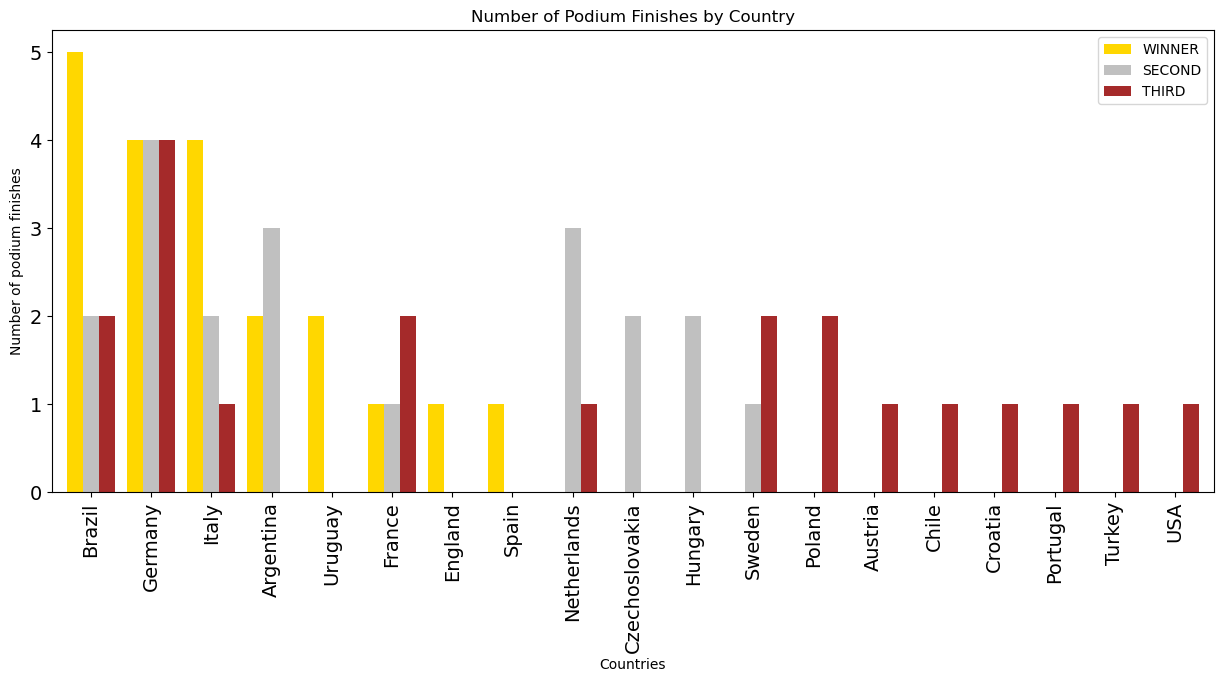

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data here
# world_cup = pd.read_csv('world_cup_data.csv')  # Example loading

gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

# Convert value counts to DataFrames and rename columns
gold_count = pd.DataFrame.from_dict(gold.value_counts()).rename(columns={'Winner': 'count'}).rename(columns={'count': 'WINNER'})
silver_count = pd.DataFrame.from_dict(silver.value_counts()).rename(columns={'Runners-Up': 'count'}).rename(columns={'count': 'SECOND'})
bronze_count = pd.DataFrame.from_dict(bronze.value_counts()).rename(columns={'Third': 'count'}).rename(columns={'count': 'THIRD'})

# Join the counts together
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')

# Fill NaN values with 0 and convert to integer type
podium_count = podium_count.fillna(0).astype(int)

# Sort values by WINNER, SECOND, and THIRD columns
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

# Plot the bar chart
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                  width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium finishes')
plt.title('Number of Podium Finishes by Country')
plt.show()


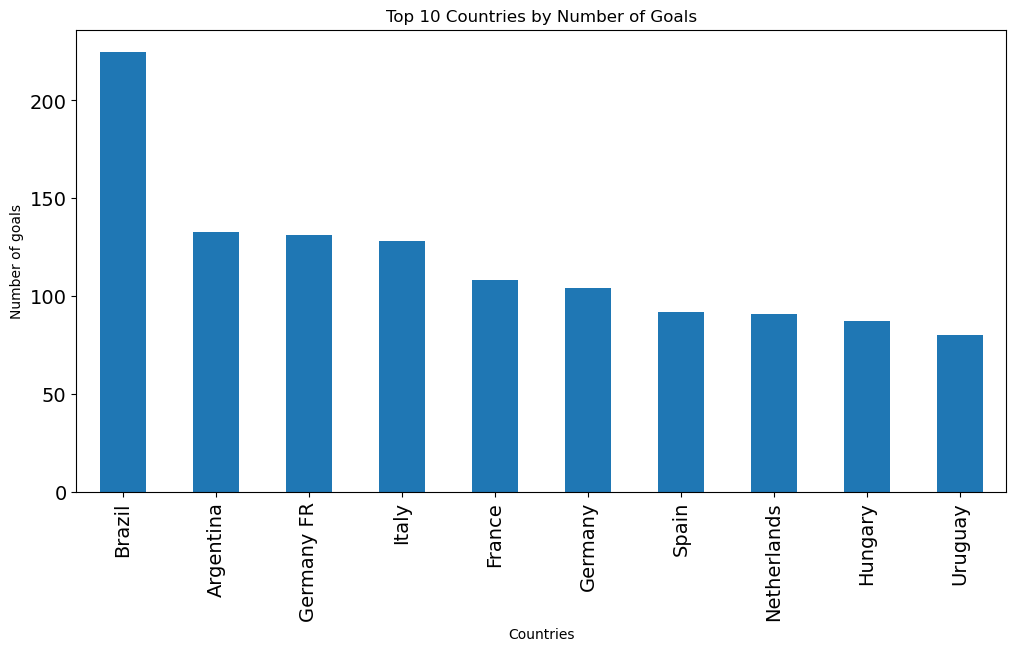

In [98]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

# Create an empty DataFrame for storing the goals per country
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])

# Use pd.concat instead of append
goal_per_country = pd.concat([goal_per_country, home.rename(columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'})])
goal_per_country = pd.concat([goal_per_country, away.rename(columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'})])

# Convert goals column to integer
goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

# Group by country and sum the goals
goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

# Plot the top 10 countries by goals
goal_per_country[:10].plot(kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 Countries by Number of Goals')
plt.show()


In [40]:
#Match outcomes by home and away teams
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [41]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [42]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [43]:
mt = matches['outcome'].value_counts()
mt

outcome
Home Team Win    488
DRAW             190
Away Team Win    174
Name: count, dtype: int64

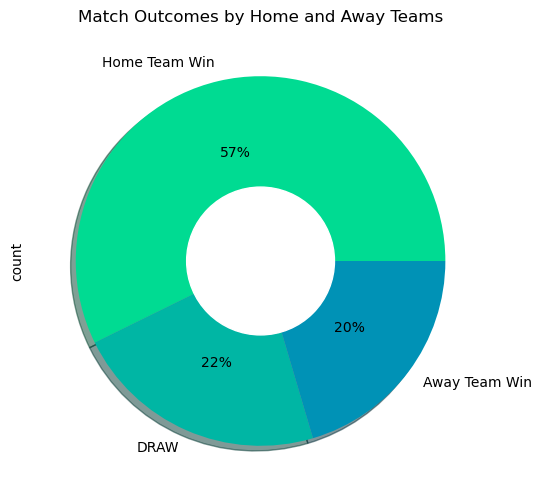

In [44]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

As we can see that Home team have a upper advantage of winning the matches as compared to the away team 
And it's more likely to have a draw thatn Away team winning the march

### Goals By Country

In [47]:
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win


In [48]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [49]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [50]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                   
1930.0 Argentina   18.0
       Brazil       5.0
       Chile        5.0
       France       4.0
       Paraguay     1.0
...                 ...
1998.0 Iran         2.0
       Mexico       8.0
       Norway       5.0
       Tunisia      1.0
2006.0 IR Iran      0.0

[427 rows x 1 columns]

In [51]:
goals = goals.reset_index()

In [52]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
...,...,...,...
355,2014.0,Japan,2.0
361,2014.0,Russia,2.0
340,2014.0,Cameroon,1.0
352,2014.0,Honduras,1.0


In [53]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
13,1934.0,Italy,12.0
11,1934.0,Germany,11.0
10,1934.0,Czechoslovakia,9.0
9,1934.0,Austria,7.0
12,1934.0,Hungary,5.0


As in this we can see that number of goals scored by the Individual Teams. Germany has scored more number of goals as compared to any other team with the toal goal 235, then Brazil with 225 and so on.

In [55]:
import plotly.graph_objects as go

In [56]:
x, y = goals['Year'].values, goals['Goals'].values

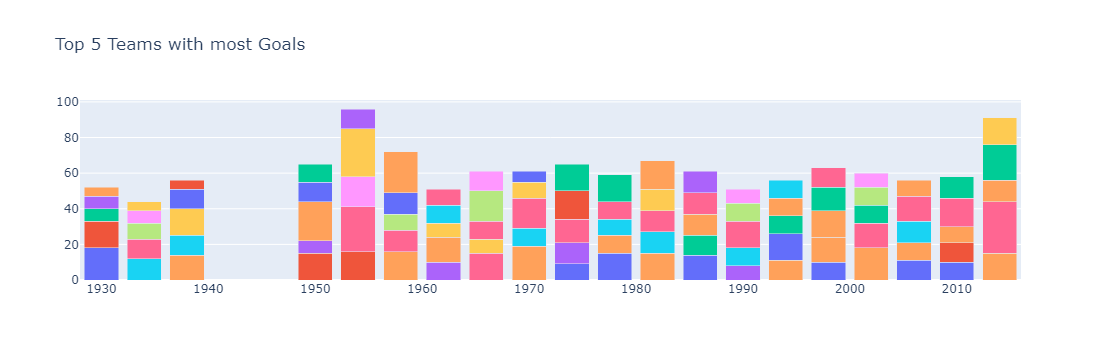

In [57]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

### Attendance

In [59]:
# For mixed formats, let pandas infer or set errors to 'coerce' for invalid formats
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

# Check for any NaT values that couldn't be parsed
print(matches[matches['Datetime'].isna()])


       Year Datetime        Stage                    Stadium          City  \
229  1970.0      NaT  Semi-finals             Estadio Azteca  Mexico City    
251  1974.0      NaT      Group 1           Volksparkstadion      Hamburg    
269  1974.0      NaT        Final             Olympiastadion       Munich    
588  2002.0      NaT      Group C     Munsu Football Stadium        Ulsan    
591  2002.0      NaT      Group C  Gwangju World Cup Stadium      Gwangju    
592  2002.0      NaT      Group H       Saitama Stadium 2002      Saitama    
602  2002.0      NaT      Group B   Jeonju World Cup Stadium       Jeonju    
605  2002.0      NaT      Group G            Kashima Stadium      Ibaraki    
613  2002.0      NaT      Group A    Suwon World Cup Stadium        Suwon    
633  2002.0      NaT  Round of 16   Jeonju World Cup Stadium       Jeonju    

    Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
229          Italy              4.0              3.0        Germany   

In [60]:
#matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))

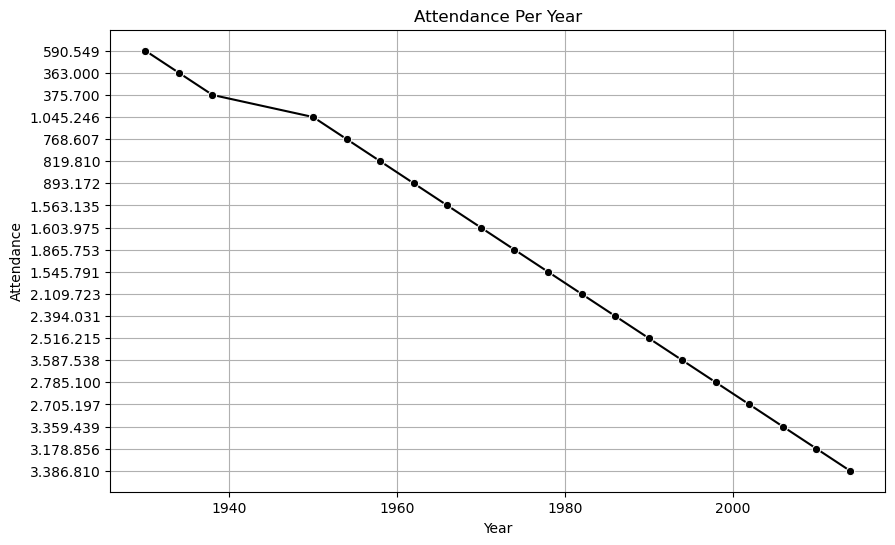

In [61]:
plt.figure(figsize=(10, 6))

# Use a line plot to show attendance over the years
sns.lineplot(data=world_cup, x='Year', y='Attendance', marker='o', color='k')

plt.title("Attendance Per Year")
plt.xlabel("Year")
plt.ylabel("Attendance")

plt.grid(True)  # Add a grid for better readability
plt.show()


As we can see the attandance as increased per world cup from 590549 to 3386810

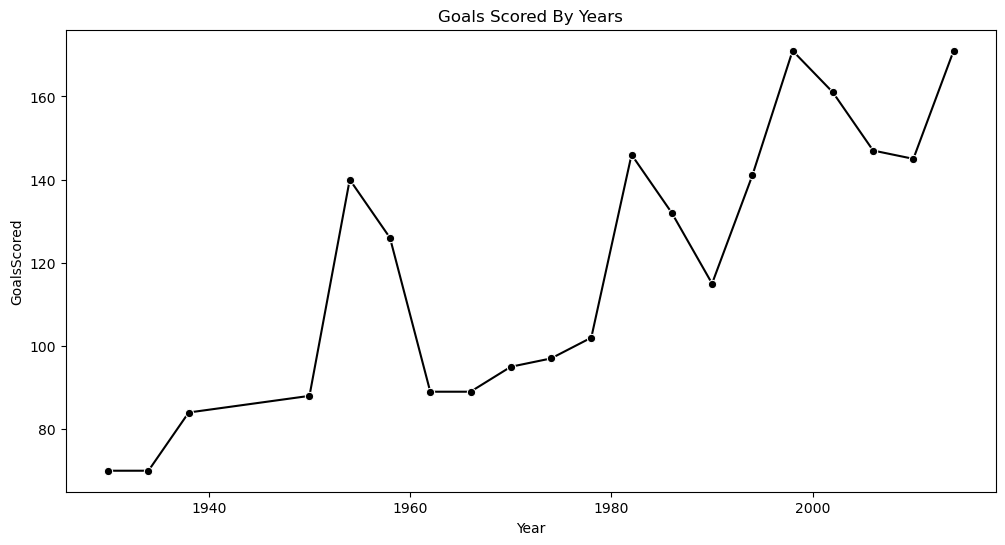

In [63]:
plt.figure(figsize=(12,6))

sns.lineplot(data = world_cup, x='Year', y='GoalsScored',marker='o', color='k')

plt.title('Goals Scored By Years')
plt.xlabel('Year')
plt.ylabel('GoalsScored')
plt.show()

We can see that the first world has least number of goal scored and the highest goal were score in 1998 and 2014 world cup 

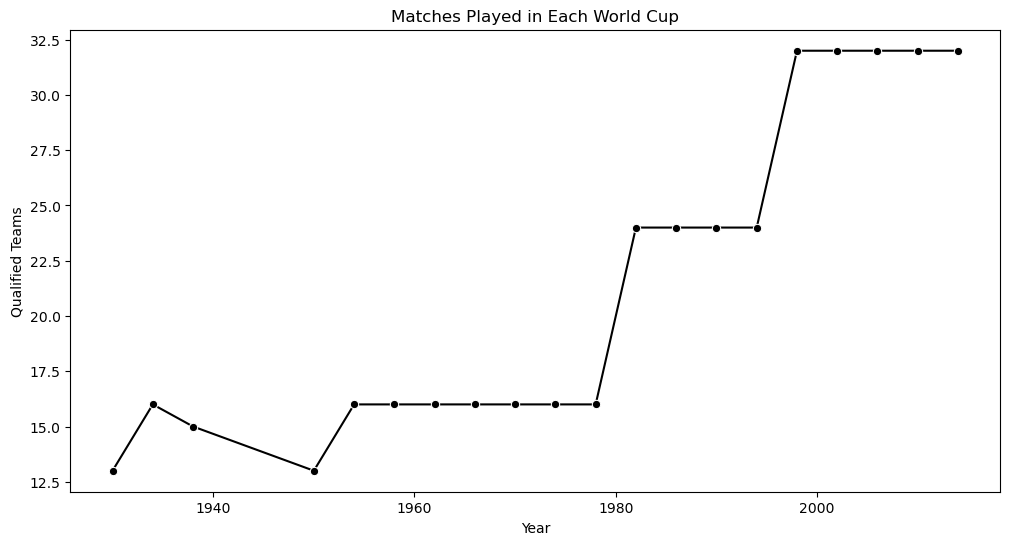

In [65]:
plt.figure(figsize=(12,6))

sns.lineplot(data=world_cup, x='Year', y='QualifiedTeams',marker='o', color='k')

plt.title('Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Qualified Teams')
plt.show()

This lineplot show that there where  in 1930 and 1950 there were least and for the last few year the qualified teams are 32 from 1998 to 2014

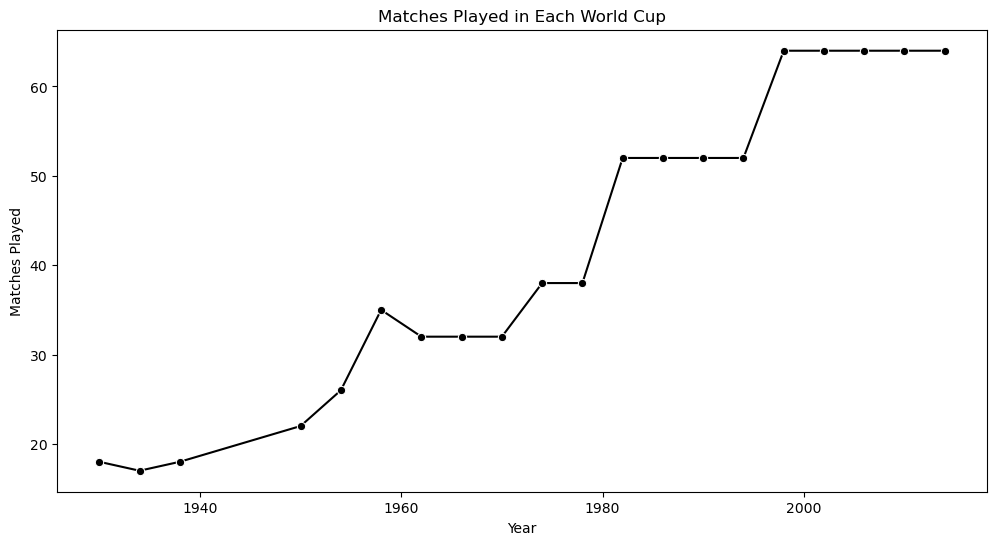

In [67]:
#Matches Played
plt.figure(figsize=(12,6))

sns.lineplot(data=world_cup, x='Year', y='MatchesPlayed',marker='o', color='k')

plt.title('Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.show()

In 1934 least number of matches were played that is 17, and in the last 5 Worlds Cups the matches have increased to 64 each

Here we can observe as that every world after 1950 tam has increased 

In [69]:
world_cup.tail(8)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
12,1986,Mexico,Argentina,Germany,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [70]:
# For mixed formats, let pandas infer or set errors to 'coerce' for invalid formats
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

# Check for any NaT values that couldn't be parsed
print(matches[matches['Datetime'].isna()])


       Year Datetime        Stage                    Stadium          City  \
229  1970.0      NaT  Semi-finals             Estadio Azteca  Mexico City    
251  1974.0      NaT      Group 1           Volksparkstadion      Hamburg    
269  1974.0      NaT        Final             Olympiastadion       Munich    
588  2002.0      NaT      Group C     Munsu Football Stadium        Ulsan    
591  2002.0      NaT      Group C  Gwangju World Cup Stadium      Gwangju    
592  2002.0      NaT      Group H       Saitama Stadium 2002      Saitama    
602  2002.0      NaT      Group B   Jeonju World Cup Stadium       Jeonju    
605  2002.0      NaT      Group G            Kashima Stadium      Ibaraki    
613  2002.0      NaT      Group A    Suwon World Cup Stadium        Suwon    
633  2002.0      NaT  Round of 16   Jeonju World Cup Stadium       Jeonju    

    Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
229          Italy              4.0              3.0        Germany   

In [71]:
import pandas as pd

# Convert 'Datetime' column to datetime objects, coerce any invalid formats to NaT
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

# Apply strftime to format the dates, handling NaT values
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y') if not pd.isnull(x) else '')

# Check the result
print(matches['Datetime'].head())


0    13 Jul, 30
1    13 Jul, 30
2    14 Jul, 30
3    14 Jul, 30
4    15 Jul, 30
Name: Datetime, dtype: object


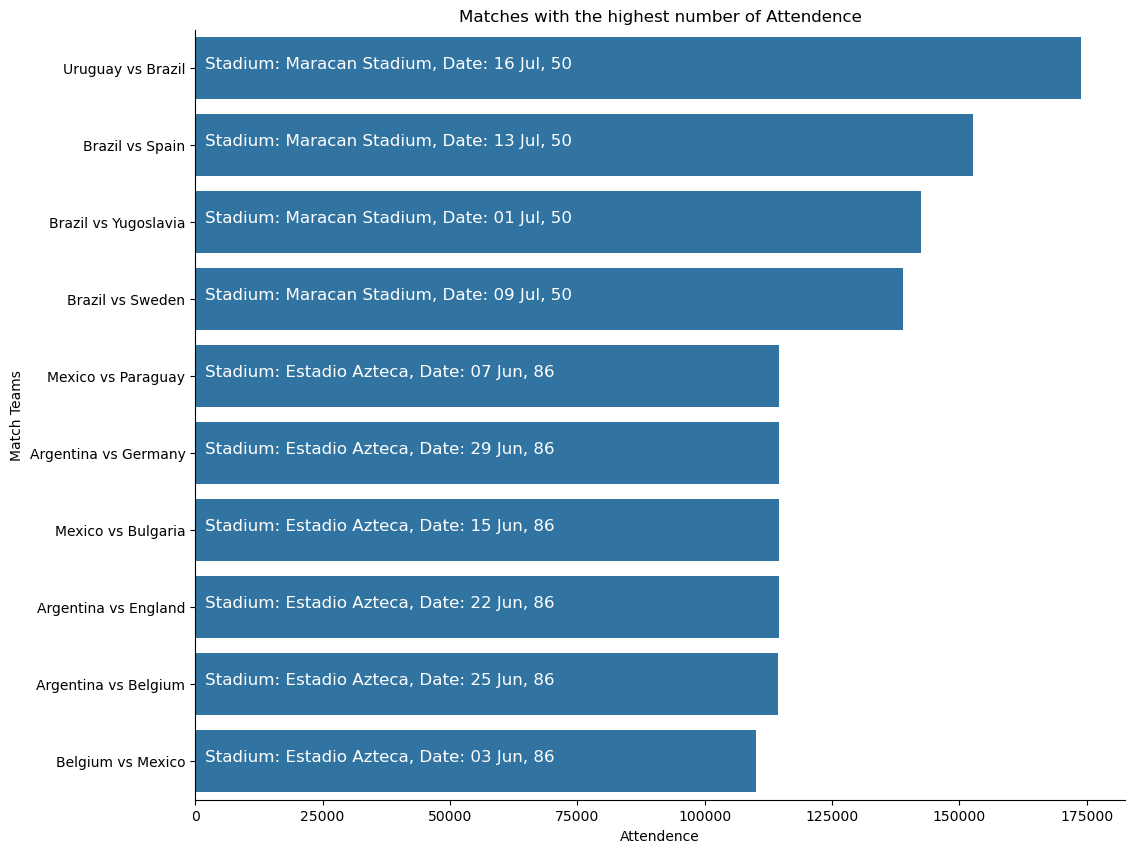

In [72]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

Observation 
1.Uruguay and Brazil was the highest Attandance match in the World Cup History that was played in 1950 followed by Brazil Vs Spain
2.Brazil Team matches have the highest attandance  

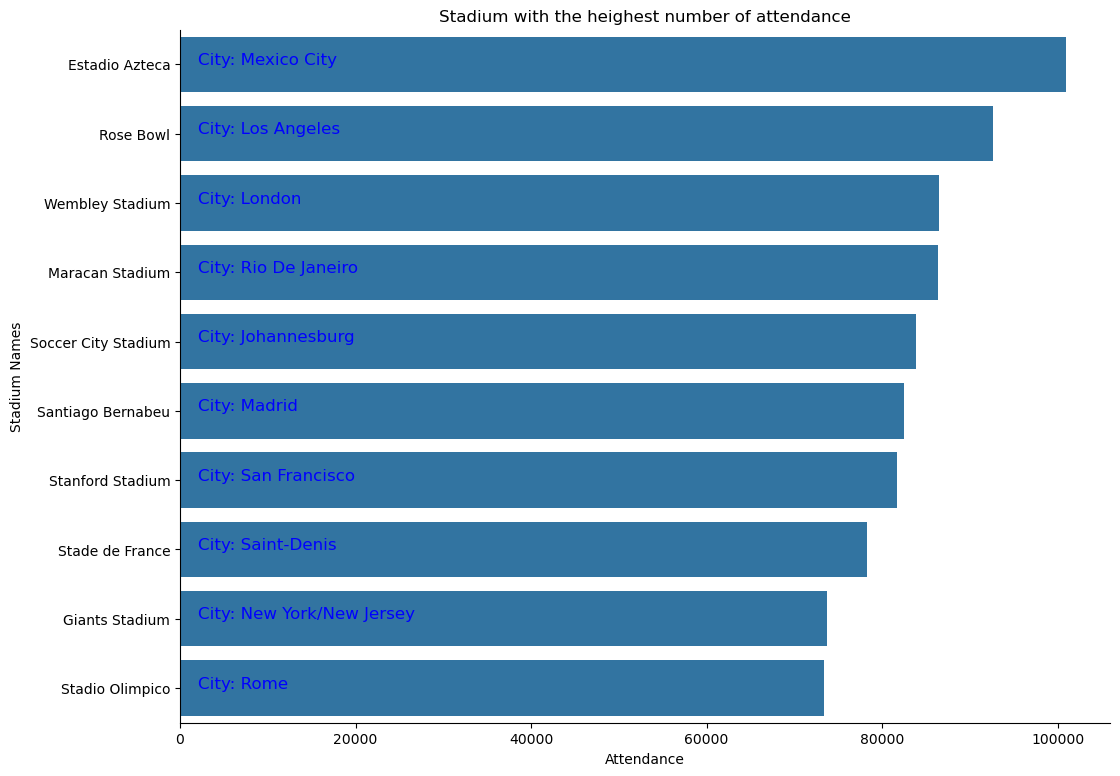

In [74]:
#Stadium with the average attandance 
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')

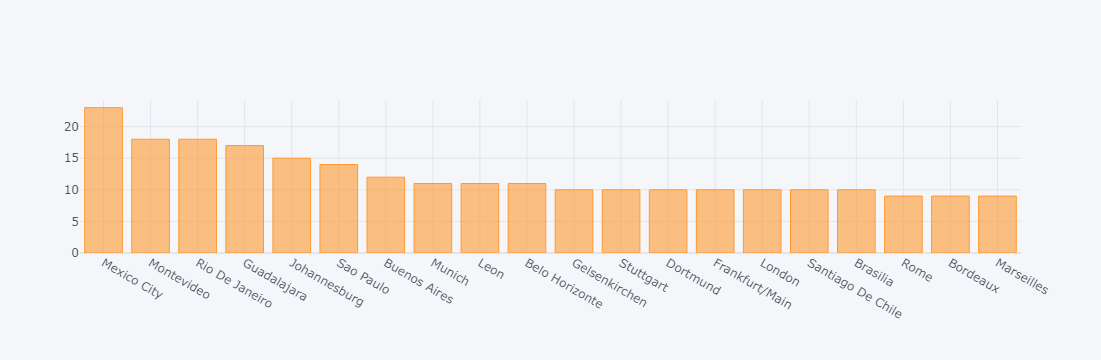

In [75]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

Mexico City have more number of matches played and Marseilles have the least number of world cup matches played
So as per the data we can say that World Cup attendance in Mexcio City is more than any team

In [84]:
import pandas as pd

# Load the datasets
matches = pd.read_csv("WorldCupMatches.csv")
players = pd.read_csv("WorldCupPlayers.csv")
world_cups = pd.read_csv("WorldCups.csv")

# Display initial information about the datasets to understand structure and relevant columns
matches_info = matches.info()
players_info = players.info()
world_cups_info = world_cups.info()

matches_head = matches.head()
players_head = players.head()
world_cups_head = world_cups.head()

matches_info, players_info, world_cups_info, matches_head, players_head, world_cups_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

(None,
 None,
 None,
      Year              Datetime    Stage         Stadium         City  \
 0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
 1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
 2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
 3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
 4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    
 
   Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
 0         France              4.0              1.0         Mexico   
 1            USA              3.0              0.0        Belgium   
 2     Yugoslavia              2.0              1.0         Brazil   
 3        Romania              3.0              1.0           Peru   
 4      Argentina              1.0              0.0         France   
 
   Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
 0                     4444.0     

In [90]:
# Data preprocessing: Focusing on WorldCupMatches for a match outcome prediction model

# Step 1: Create a new column to represent match outcome
# Assumption: Home team win = 'Win', Away team win = 'Loss', Draw = 'Draw'
matches['Outcome'] = matches.apply(
    lambda row: 'Win' if row['Home Team Goals'] > row['Away Team Goals'] else ('Loss' if row['Home Team Goals'] < row['Away Team Goals'] else 'Draw'), 
    axis=1
)

# Step 2: Select relevant features for prediction
# Using 'Home Team Goals', 'Away Team Goals', 'Half-time Home Goals', 'Half-time Away Goals', and 'Attendance'
features = matches[['Home Team Goals', 'Away Team Goals', 'Half-time Home Goals', 'Half-time Away Goals', 'Attendance']]
target = matches['Outcome']

# Check for any null values and handle them if present
features = features.fillna(0)

# Display the prepared features and target
features.head(), target.head()


(   Home Team Goals  Away Team Goals  Half-time Home Goals  \
 0              4.0              1.0                   3.0   
 1              3.0              0.0                   2.0   
 2              2.0              1.0                   2.0   
 3              3.0              1.0                   1.0   
 4              1.0              0.0                   0.0   
 
    Half-time Away Goals  Attendance  
 0                   0.0      4444.0  
 1                   0.0     18346.0  
 2                   0.0     24059.0  
 3                   0.0      2549.0  
 4                   0.0     23409.0  ,
 0    Win
 1    Win
 2    Win
 3    Win
 4    Win
 Name: Outcome, dtype: object)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#accuracy, classification_rep
print(accuracy)
print (classification_rep)

0.9989071038251366
              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00       762
        Loss       1.00      0.97      0.99        39
         Win       1.00      1.00      1.00       114

    accuracy                           1.00       915
   macro avg       1.00      0.99      1.00       915
weighted avg       1.00      1.00      1.00       915

